### 패키지 및 데이터셋 호출

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams["font.family"] = "NanumGothic"


customers_df = pd.read_csv("./data/olist_customers_dataset.csv")
geolocation_df = pd.read_csv("./data/olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("./data/olist_order_items_dataset.csv")
order_payments = pd.read_csv("./data/olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("./data/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("./data/olist_orders_dataset.csv")
products_df = pd.read_csv("./data/olist_products_dataset.csv")
sellers_df = pd.read_csv("./data/olist_sellers_dataset.csv")

### 데이터 정보

In [3]:
customers_df.info()
geolocation_df.info()
order_items_df.info()  #
order_payments.info()  #
order_reviews_df.info()
orders_df.info()  #
products_df.info()  #
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

### Olist 정보
-Olist Store
    -Olist Website
    -the largest department store in Brazilian marketplaces
    -브라질 전국의 소규모 기업들과 connection
    -Olist store에서 물건을 팔고 Olist의 물류센터를 통해 직접 고객에게 물품 배송 가능

#### 카테고리 번역

In [4]:
# 데이터 준비
data = {
    "카테고리": [
        "cama_mesa_banho",
        "esporte_lazer",
        "moveis_decoracao",
        "beleza_saude",
        "utilidades_domesticas",
        "automotivo",
        "informatica_acessorios",
        "brinquedos",
        "relogios_presentes",
        "telefonia",
        "bebes",
        "perfumaria",
        "papelaria",
        "fashion_bolsas_e_acessorios",
        "cool_stuff",
        "ferramentas_jardim",
        "pet_shop",
        "eletronicos",
        "construcao_ferramentas_construcao",
        "eletrodomesticos",
        "malas_acessorios",
        "consoles_games",
        "moveis_escritorio",
        "instrumentos_musicais",
        "eletroportateis",
        "casa_construcao",
        "livros_interesse_geral",
        "fashion_calcados",
        "moveis_sala",
        "climatizacao",
        "livros_tecnicos",
        "telefonia_fixa",
        "casa_conforto",
        "market_place",
        "alimentos_bebidas",
        "fashion_roupa_masculina",
        "moveis_cozinha_area_de_servico_jantar_e_jardim",
        "sinalizacao_e_seguranca",
        "construcao_ferramentas_seguranca",
        "eletrodomesticos_2",
        "construcao_ferramentas_jardim",
        "alimentos",
        "bebidas",
        "construcao_ferramentas_iluminacao",
        "agro_industria_e_comercio",
        "industria_comercio_e_negocios",
        "artigos_de_natal",
        "audio",
        "artes",
        "fashion_underwear_e_moda_praia",
        "dvds_blu_ray",
        "moveis_quarto",
        "construcao_ferramentas_ferramentas",
        "portateis_casa_forno_e_cafe",
        "livros_importados",
        "pcs",
        "cine_foto",
        "fashion_roupa_feminina",
        "musica",
        "artigos_de_festas",
        "fashion_esporte",
        "artes_e_artesanato",
        "flores",
        "fraldas_higiene",
        "la_cuisine",
        "portateis_cozinha_e_preparadores_de_alimentos",
        "moveis_colchao_e_estofado",
        "tablets_impressao_imagem",
        "fashion_roupa_infanto_juvenil",
        "casa_conforto_2",
        "pc_gamer",
        "seguros_e_servicos",
        "cds_dvds_musicais",
    ],
    "번역": [
        "침대, 식탁보, 목욕 용품",
        "스포츠 및 레저 활동",
        "가구 및 홈 데코",
        "미용 및 건강 제품",
        "가정용 필수품 및 일상 용품",
        "자동차 제품 및 액세서리",
        "컴퓨터 및 액세서리",
        "장난감",
        "시계 및 선물",
        "통신 기기, 전화기 포함",
        "아기 제품",
        "향수 및 프래그런스",
        "문구류",
        "패션 액세서리 및 가방",
        "독특하거나 신기한 아이템",
        "정원 도구",
        "애완동물 용품",
        "전자제품",
        "건축 도구",
        "가전제품",
        "여행가방 및 액세서리",
        "게임 콘솔",
        "사무용 가구",
        "악기",
        "휴대용 가전제품",
        "주택 건축 아이템",
        "일반 도서",
        "패션 신발",
        "거실 가구",
        "기후 조절 제품",
        "기술 서적",
        "유선 전화",
        "집 안락 용품",
        "마켓플레이스 아이템",
        "식품 및 음료",
        "남성 의류",
        "주방, 세탁 공간, 식사 공간 및 정원 가구",
        "신호 및 안전",
        "건축 및 안전 도구",
        "추가 가전제품",
        "정원 건축 도구",
        "식품",
        "음료",
        "조명 건축 도구",
        "농업, 산업 및 상업",
        "산업, 상업 및 비즈니스",
        "크리스마스 용품",
        "오디오",
        "예술",
        "속옷 및 해변 패션",
        "DVD 및 블루레이",
        "침실 가구",
        "건축 도구 및 기구",
        "휴대용 주방 기기 및 커피 기구",
        "수입 도서",
        "PC",
        "영화 및 사진",
        "여성 의류",
        "음악",
        "파티 용품",
        "스포츠 패션",
        "예술 및 공예",
        "꽃",
        "기저귀 및 위생 용품",
        "주방용품",
        "휴대용 주방 기기 및 식품 준비 기기",
        "가구, 매트리스 및 소파",
        "태블릿, 인쇄 및 이미지",
        "아동 및 청소년 의류",
        "추가 집 안락 용품",
        "게이밍 PC",
        "보험 및 서비스",
        "음악 CD 및 DVD",
    ],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임 출력
print(df)

                             카테고리               번역
0                 cama_mesa_banho   침대, 식탁보, 목욕 용품
1                   esporte_lazer      스포츠 및 레저 활동
2                moveis_decoracao        가구 및 홈 데코
3                    beleza_saude       미용 및 건강 제품
4           utilidades_domesticas  가정용 필수품 및 일상 용품
..                            ...              ...
68  fashion_roupa_infanto_juvenil      아동 및 청소년 의류
69                casa_conforto_2       추가 집 안락 용품
70                       pc_gamer           게이밍 PC
71             seguros_e_servicos         보험 및 서비스
72              cds_dvds_musicais      음악 CD 및 DVD

[73 rows x 2 columns]


In [5]:
df_dict = {}

for i in range(len(df["번역"])):
    key = df["카테고리"][i]
    val = df["번역"][i]
    df_dict[key] = val

# 맵핑을 통해 카테고리를 한글로 변경
products_df["product_category_name"] = products_df["product_category_name"].map(df_dict)

### 제품 데이터프레임

In [6]:
products_joined_df = pd.merge(products_df, order_items_df, on="product_id")

print(products_joined_df.head(10))
print(products_joined_df.tail(10))

                         product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            향수 및 프래그런스   
1  3aa071139cb16b67ca9e5dea641aaa2f                    예술   
2  96bd76ec8810374ed1b65e291975717f           스포츠 및 레저 활동   
3  cef67bcfe19066a932b7673e239eb23d                 아기 제품   
4  9dc1a7de274444849c219cff195d0b71       가정용 필수품 및 일상 용품   
5  41d3672d4792049fa1779bb35283ed13                    악기   
6  732bd381ad09e530fe0a5f457d81becb         독특하거나 신기한 아이템   
7  732bd381ad09e530fe0a5f457d81becb         독특하거나 신기한 아이템   
8  2548af3e6e77a690cf3eb6368e9ab61e             가구 및 홈 데코   
9  2548af3e6e77a690cf3eb6368e9ab61e             가구 및 홈 데코   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0          

In [7]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [8]:
products_joined_df.isnull().sum()

product_id                       0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

### 제품 + 주문 데이터 프레임

In [9]:
# canceled 삭제
orders_df["order_status"].unique()
order_stat = [
    "delivered",
    "invoiced",
    "shipped",
    "processing",
    "unavailable",
    "created",
    "approved",
]
orders_df = orders_df[orders_df["order_status"].isin(order_stat)]
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
products_payments_joined_df1 = pd.merge(orders_df, products_joined_df, on="order_id")

print(products_payments_joined_df1.head(10))
print(products_payments_joined_df1.tail(10))

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2   

In [11]:
products_payments_joined_df = pd.merge(
    products_payments_joined_df1, order_payments, on="order_id"
)

print(products_payments_joined_df.head(10))
print(products_payments_joined_df.tail(10))

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
5  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
6  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
7  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
8  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
9  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2   

In [12]:
data = pd.DataFrame(products_payments_joined_df["product_category_name"].value_counts())
x = products_payments_joined_df["product_category_name"].value_counts().index
y = products_payments_joined_df["product_category_name"].value_counts().values


px.bar(data, x=x, y=y)

In [13]:
products_payments_joined_df["product_id"].value_counts()

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    536
99a4788cb24856965c36a24e339b6058    524
422879e10f46682990de24d770e7f83d    505
389d119b48cf3043d311335e499d9c6b    404
368c6c730842d78016ad823897a372db    395
                                   ... 
829bf203f2226753874fe84c6b8c5a1d      1
b7db6602d7706acf38d5b9a0e403002d      1
550614095d4a8d359bf569ea168fe053      1
2dfd94a67354f13a87ed35a8aac986af      1
006619bbed68b000c8ba3f8725d5409e      1
Name: count, Length: 32735, dtype: int64

In [14]:
products_payments_joined_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      758
order_delivered_customer_date    2008
order_estimated_delivery_date       0
product_id                          0
product_category_name            1683
product_name_lenght              1683
product_description_lenght       1683
product_photos_qty               1683
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
order_item_id                       0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [15]:
data_photo = pd.DataFrame(
    products_payments_joined_df["product_photos_qty"].value_counts()
)
plt.figure
px.bar(
    data_photo,
    x=products_payments_joined_df["product_photos_qty"].value_counts().index,
    y=products_payments_joined_df["product_photos_qty"].value_counts().values,
)

가설I
귀무가설 (H0): 사진이 3장과 다른 경우에 판매량이 더 낮아진다.

즉, 사진이 3장인 경우의 판매량이 다른 경우보다 더 낮거나 같다는 가설입니다.

대립가설 (H1): 사진이 3장인 경우의 판매량이 가장 좋다.

즉, 사진이 3장인 경우의 판매량이 다른 경우보다 더 높다는 가설입니다.


### 카테고리가 비어있는 항목에 대한 결측치 대체

In [16]:
missed_id = products_payments_joined_df[
    products_payments_joined_df["product_category_name"].isnull()
].loc[:, "product_id"]
products_payments_joined_df["product_id"].isin(missed_id).value_counts()
print(missed_id)
products_payments_joined_df[
    products_payments_joined_df["product_id"] == "9820e04e332fc450d6fd975befc1bc28"
]

8         a1804276d9941ac0733cfd409f5206eb
129       71225f49be70df4297892f6a5fa62171
221       9820e04e332fc450d6fd975befc1bc28
274       3bc5164bc7f4be77002d6651da65c98c
316       5a848e4ab52fd5445cdc07aab1c40e48
                        ...               
116598    8d39a63db6a98e40571f486e0c711cf7
116772    e9cbc0910ab050cbd92fbeb051c270ea
116779    0c877471e35049402bca235e06cb8063
116785    5a848e4ab52fd5445cdc07aab1c40e48
116804    bfa0e398bef2d28bb421d42997982cab
Name: product_id, Length: 1683, dtype: object


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
221,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13 09:18:50,2017-09-13 13:45:43,2017-09-14 21:20:03,2017-09-21 21:16:17,2017-09-25 00:00:00,9820e04e332fc450d6fd975befc1bc28,NaN,...,30.0,1,520b493b57809f446cb0a233bb3e25c7,2017-09-19 13:45:43,110.0,14.16,1,credit_card,5,124.16
19193,6fc020b0ec995fb761ee385f34df5a6a,41a657674484cf533a6cf683a1063ace,delivered,2017-09-13 16:59:00,2017-09-13 17:10:40,2017-09-14 21:20:03,2017-09-16 15:25:58,2017-09-25 00:00:00,9820e04e332fc450d6fd975befc1bc28,NaN,...,30.0,1,520b493b57809f446cb0a233bb3e25c7,2017-09-19 17:10:40,110.0,14.16,1,credit_card,6,124.16


In [17]:
products_payments_joined_df = products_payments_joined_df.dropna()

In [18]:
products_payments_joined_df["order_status"].value_counts()

order_status
delivered    113383
Name: count, dtype: int64

### 나머지 데이터 병합

In [19]:
products_payments_joined_df2 = pd.merge(
    products_payments_joined_df, customers_df, on="customer_id"
)

In [33]:
photo_1 = products_payments_joined_df2[
    products_payments_joined_df2["product_photos_qty"] == 1
]
photo_2 = products_payments_joined_df2[
    products_payments_joined_df2["product_photos_qty"] == 2
]
photo_3 = products_payments_joined_df2[
    products_payments_joined_df2["product_photos_qty"] == 3
]
photo_4 = products_payments_joined_df2[
    products_payments_joined_df2["product_photos_qty"] == 4
]
photo_5 = products_payments_joined_df2[
    products_payments_joined_df2["product_photos_qty"] == 5
]
photo_20 = products_payments_joined_df2[
    products_payments_joined_df2["product_photos_qty"] == 2
]

In [21]:
data_v = pd.DataFrame(
    products_payments_joined_df2["product_category_name"].value_counts()
)
x = products_payments_joined_df2["product_category_name"].value_counts().index
y = products_payments_joined_df2["product_category_name"].value_counts().values

px.bar(data_v, x=x, y=y)

In [22]:
products_payments_joined_df2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,가정용 필수품 및 일상 용품,...,29.99,8.72,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,가정용 필수품 및 일상 용품,...,29.99,8.72,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,가정용 필수품 및 일상 용품,...,29.99,8.72,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,향수 및 프래그런스,...,118.70,22.76,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,자동차 제품 및 액세서리,...,159.90,19.22,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113378,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,f1d4ce8c6dd66c47bbaa8c6781c2a923,아기 제품,...,174.90,20.10,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
113379,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,b80910977a37536adeddd63663f916ad,추가 가전제품,...,205.99,65.02,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
113380,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,d1c427060a0f73f6b889a5c7c61f2ac4,컴퓨터 및 액세서리,...,179.99,40.59,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
113381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,d1c427060a0f73f6b889a5c7c61f2ac4,컴퓨터 및 액세서리,...,179.99,40.59,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [34]:
photo_1["product_category_name"].value_counts()
photo_2["product_category_name"].value_counts()
photo_3["product_category_name"].value_counts()
photo_4["product_category_name"].value_counts()
photo_5["product_category_name"].value_counts()
photo_20["product_category_name"].value_counts()

product_category_name
정원 도구                   2481
침대, 식탁보, 목욕 용품          1823
가구 및 홈 데코               1658
시계 및 선물                 1546
컴퓨터 및 액세서리              1542
                        ... 
휴대용 주방 기기 및 커피 기구          2
꽃                          2
추가 집 안락 용품                 1
휴대용 주방 기기 및 식품 준비 기기       1
주방용품                       1
Name: count, Length: 69, dtype: int64

In [ ]:
datav = photo_1["product_category_name"].value_counts()
data_v = pd.DataFrame(datav)
x = datav.index
y = datav.values

px.bar(data_v, x=x, y=y)

In [ ]:
datav = photo_2["product_category_name"].value_counts()
data_v = pd.DataFrame(datav)
x = datav.index
y = datav.values

px.bar(data_v, x=x, y=y)

In [ ]:
datav = photo_3["product_category_name"].value_counts()
data_v = pd.DataFrame(datav)
x = datav.index
y = datav.values

px.bar(data_v, x=x, y=y)

In [ ]:
datav = photo_4["product_category_name"].value_counts()
data_v = pd.DataFrame(datav)
x = datav.index
y = datav.values

px.bar(data_v, x=x, y=y)

In [ ]:
datav = photo_5["product_category_name"].value_counts()
data_v = pd.DataFrame(datav)
x = datav.index
y = datav.values

px.bar(data_v, x=x, y=y)

In [ ]:
datav = photo_20["product_category_name"].value_counts()
data_v = pd.DataFrame(datav)
x = datav.index
y = datav.values

px.bar(data_v, x=x, y=y)

In [80]:
photo_1["product_category_name"].value_counts()

product_category_name
침대, 식탁보, 목욕 용품    8643
미용 및 건강 제품        6311
스포츠 및 레저 활동       4867
컴퓨터 및 액세서리        4834
가구 및 홈 데코         3936
                  ... 
예술 및 공예              6
스포츠 패션               5
패션 신발                4
아동 및 청소년 의류          3
보험 및 서비스             1
Name: count, Length: 71, dtype: int64

### 카테고리별 가격분포

In [60]:
photo_5["product_category_name"].value_counts().head(20).index

Index(['스포츠 및 레저 활동', '가정용 필수품 및 일상 용품', '침대, 식탁보, 목욕 용품', '장난감',
       '패션 액세서리 및 가방', '자동차 제품 및 액세서리', '통신 기기, 전화기 포함', '미용 및 건강 제품',
       '시계 및 선물', '가구 및 홈 데코', '컴퓨터 및 액세서리', '아기 제품', '문구류', '독특하거나 신기한 아이템',
       '정원 도구', '여행가방 및 액세서리', '주방, 세탁 공간, 식사 공간 및 정원 가구', '게임 콘솔', '애완동물 용품',
       '악기'],
      dtype='object', name='product_category_name')

In [76]:
photo_1["price"]

3         118.70
4         159.90
7         147.90
8          59.99
10        149.99
           ...  
113375    370.00
113377     72.00
113380    179.99
113381    179.99
113382     68.50
Name: price, Length: 57223, dtype: float64

In [75]:
pd.DataFrame(photo_1.loc[:, ["product_category_name", "price"]].value_counts().head(20))

count
product_category_name price        
침대, 식탁보, 목욕 용품        89.90     561
컴퓨터 및 액세서리            149.90    306
침대, 식탁보, 목욕 용품        99.90     303
                      69.90     299
미용 및 건강 제품            29.90     290
                      110.32    285
가구 및 홈 데코             38.40     250
                      35.00     246
독특하거나 신기한 아이템         99.99     237
전자제품                  13.65     219
침대, 식탁보, 목욕 용품        79.90     212
전자제품                  18.90     200
                      19.90     196
침대, 식탁보, 목욕 용품        56.99     186
스포츠 및 레저 활동           69.90     182
침대, 식탁보, 목욕 용품        24.90     181
스포츠 및 레저 활동           59.90     179
미용 및 건강 제품            23.99     176
사무용 가구                79.99     169
가정용 필수품 및 일상 용품       59.90     157

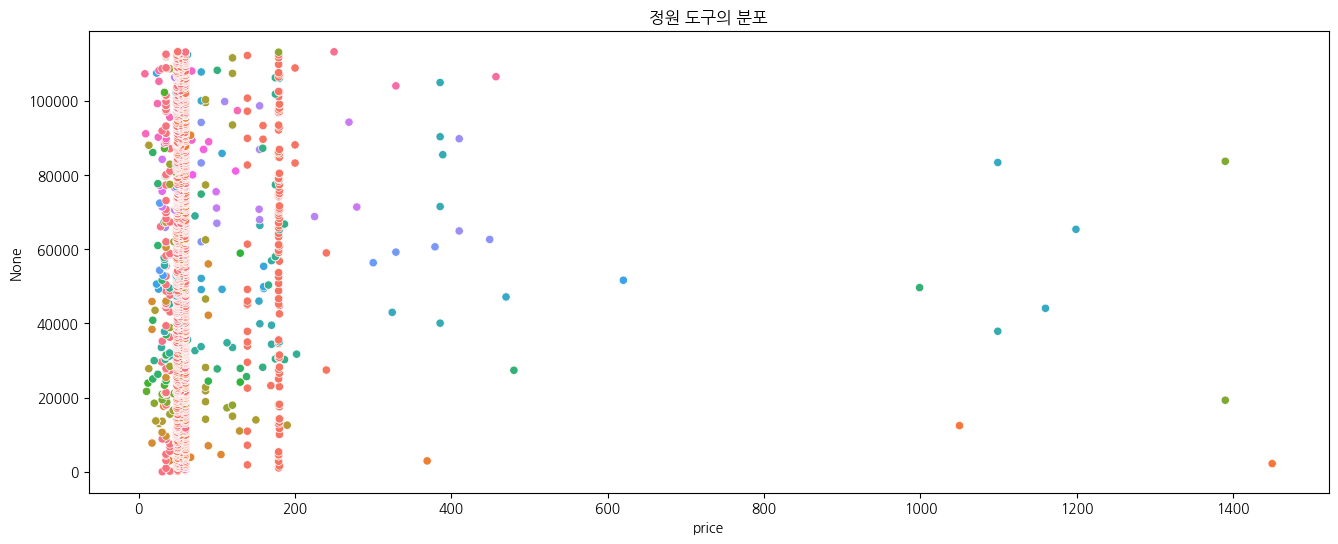

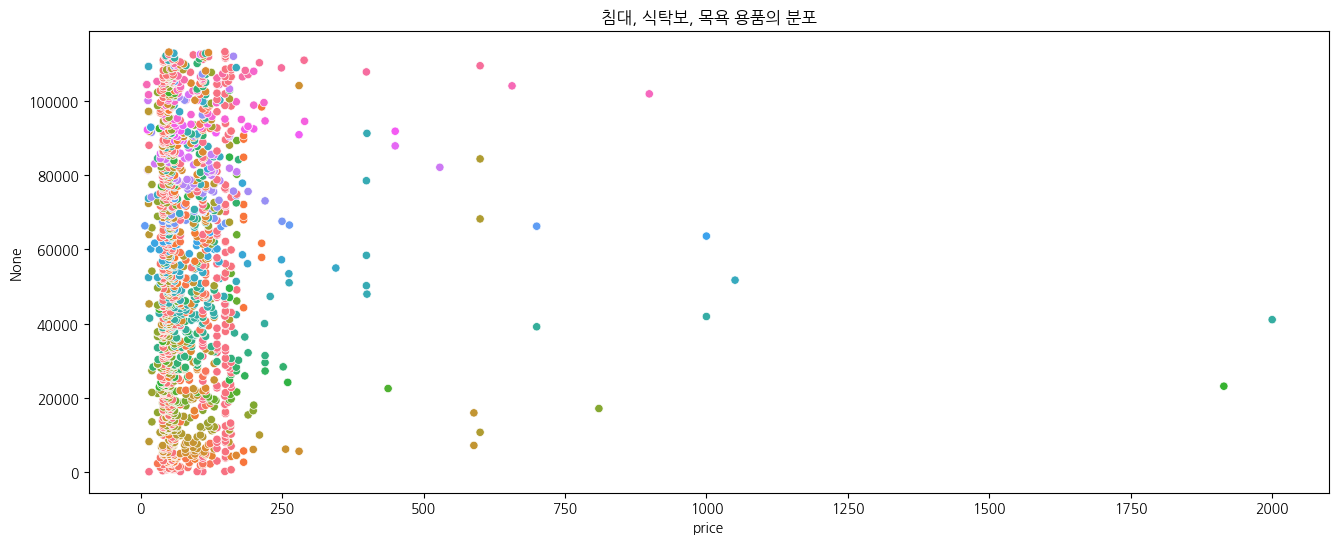

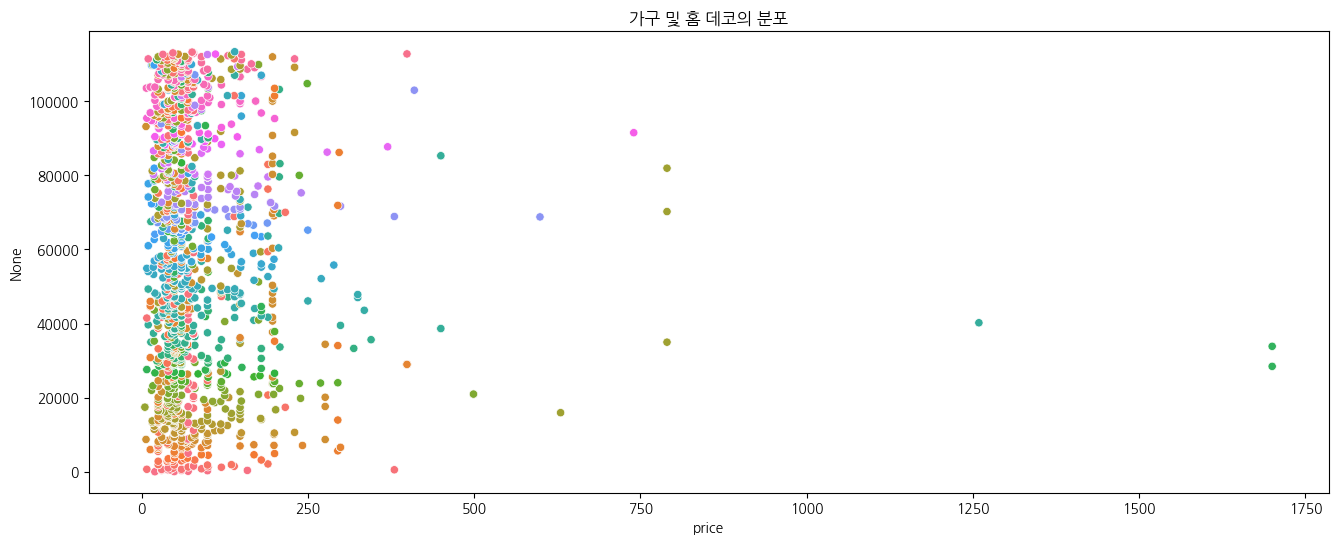

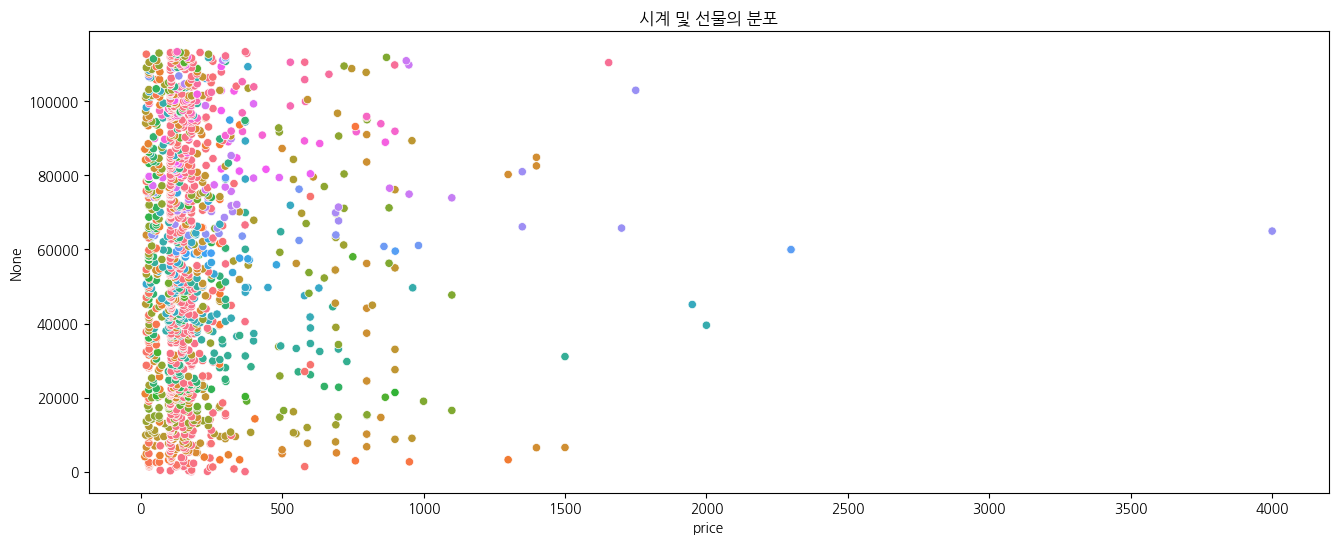

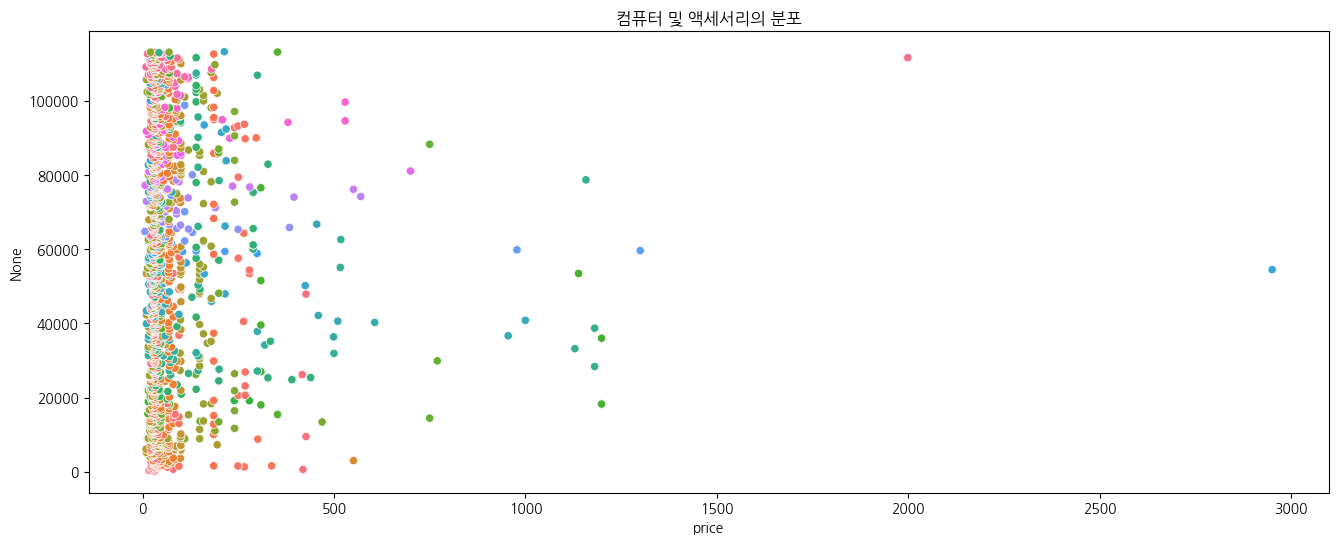

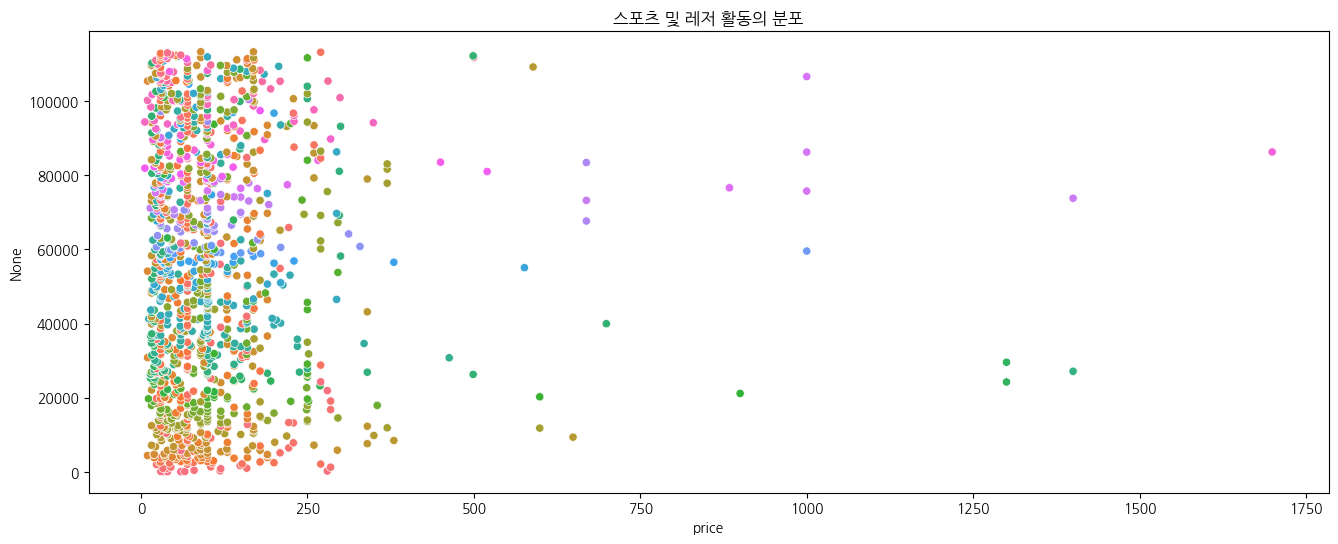

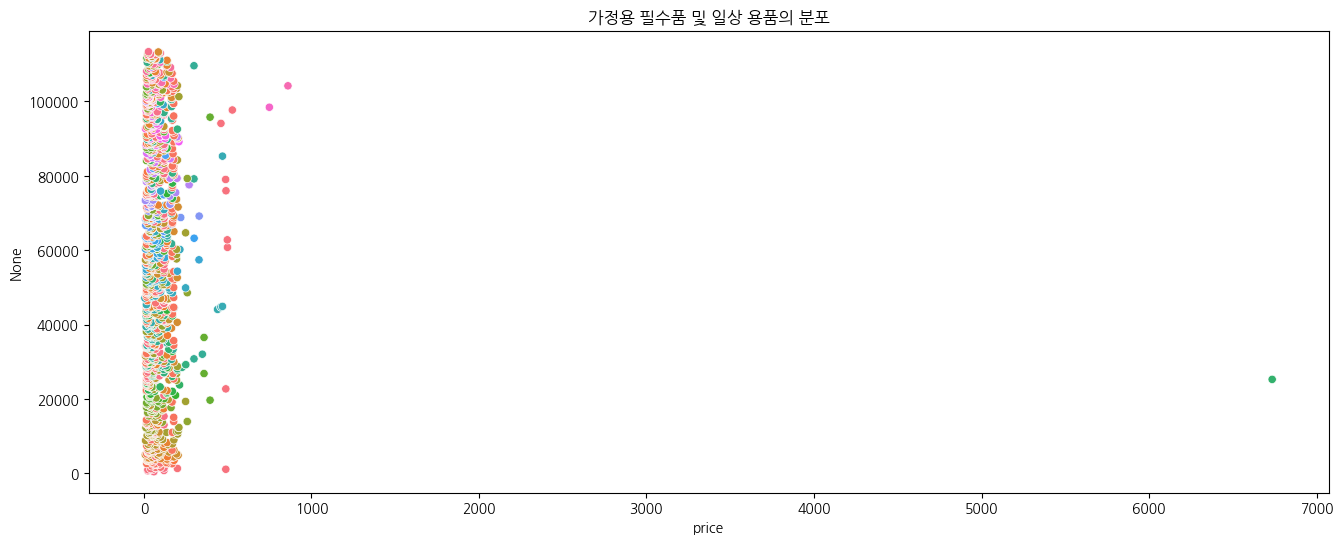

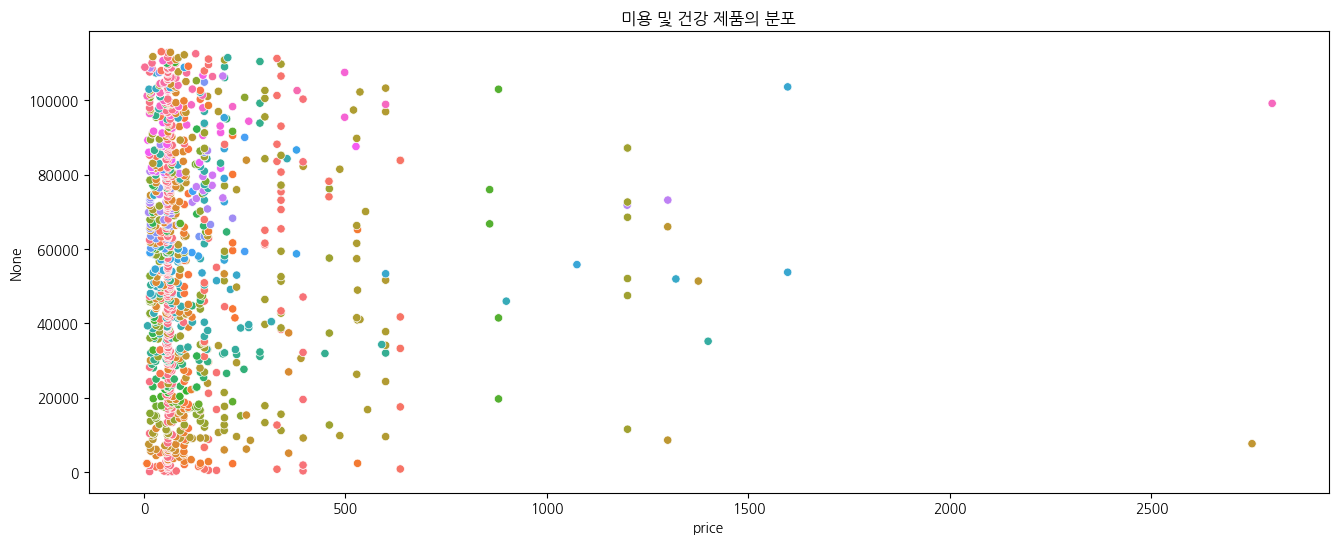

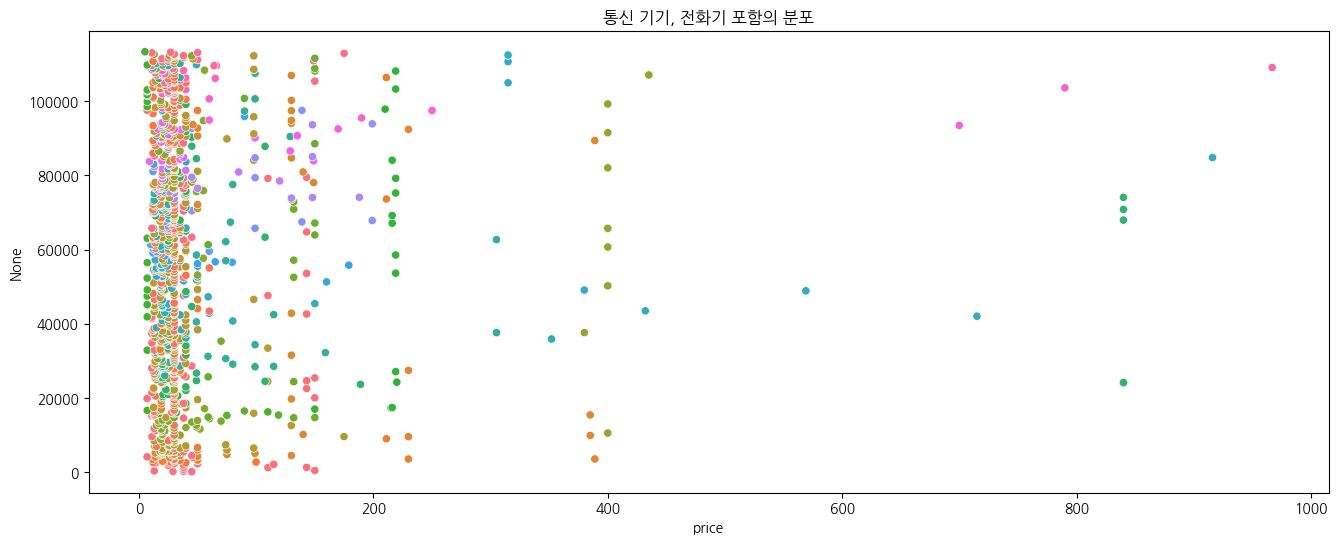

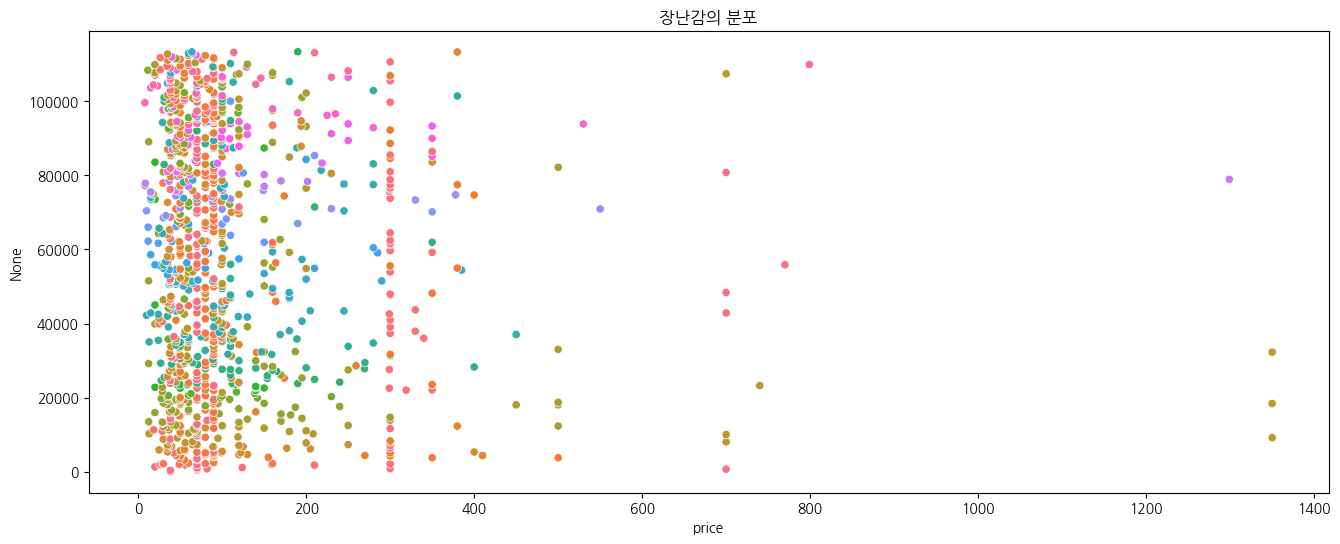

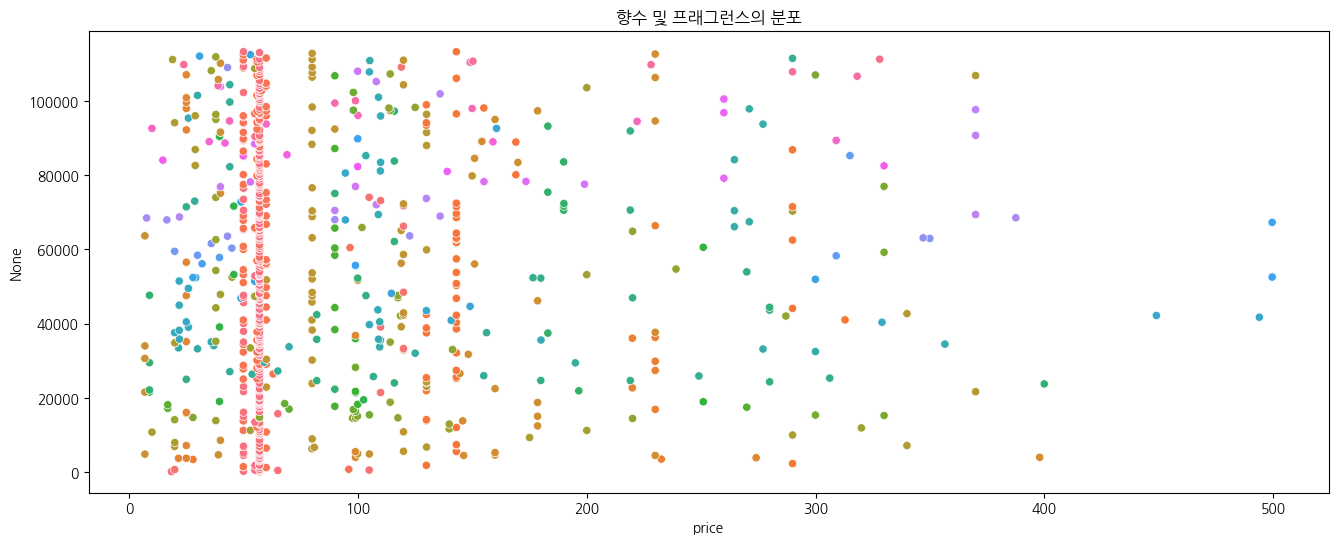

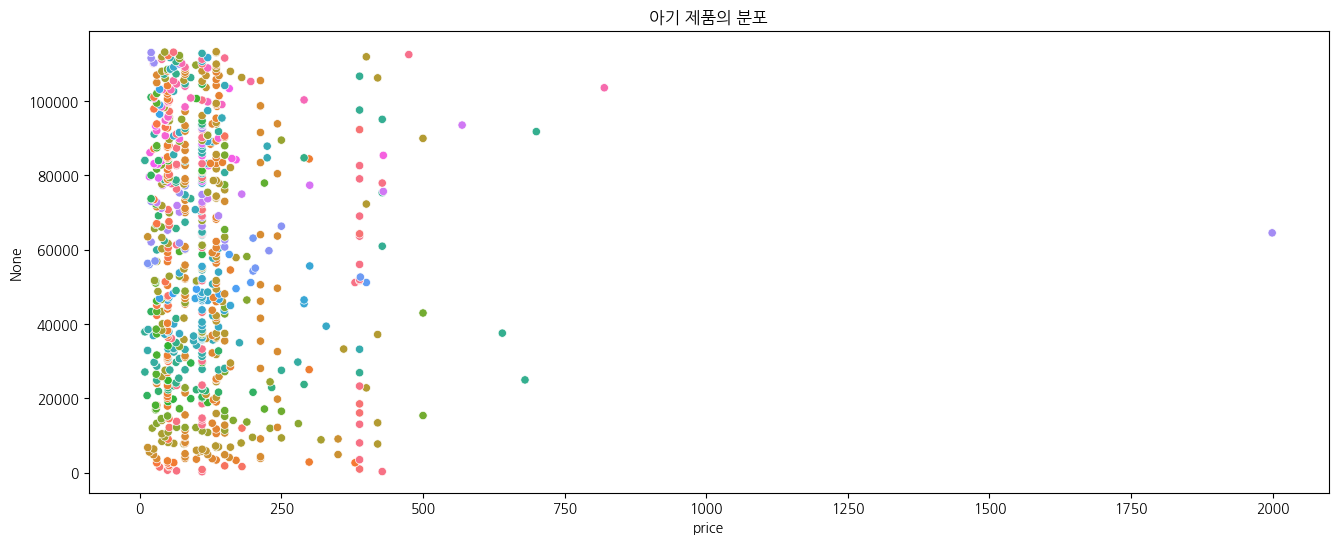

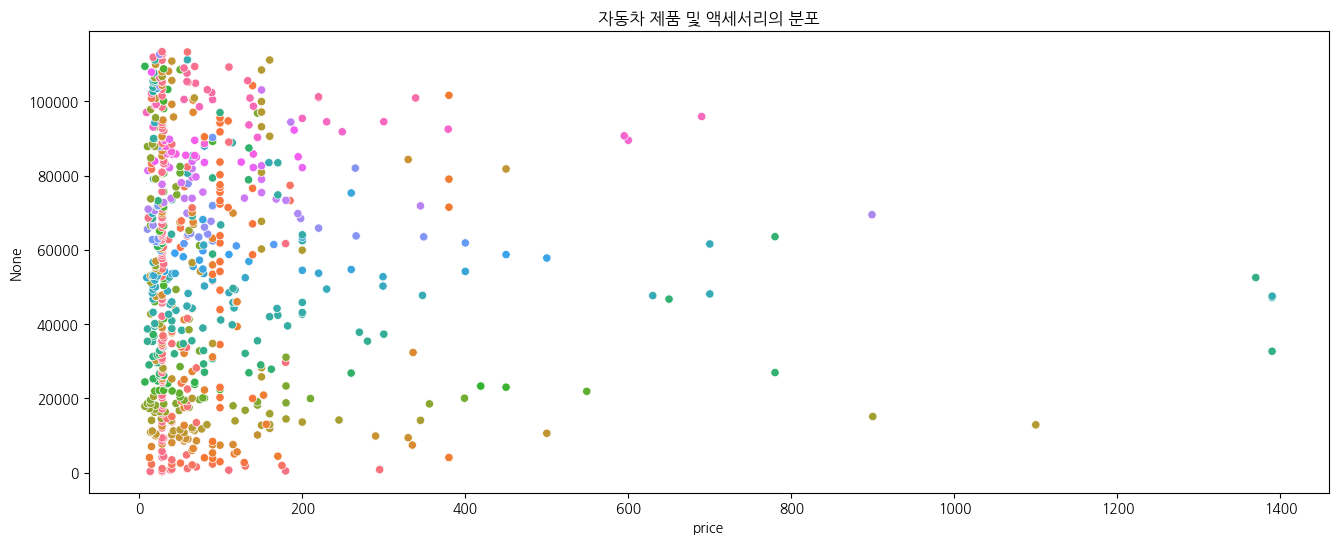

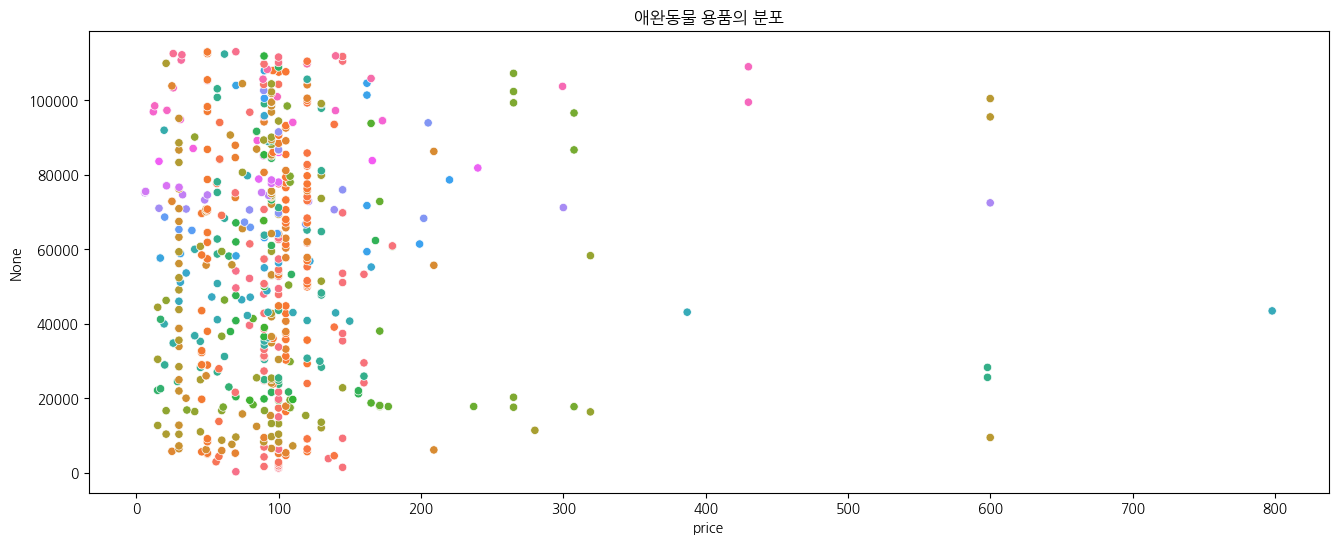

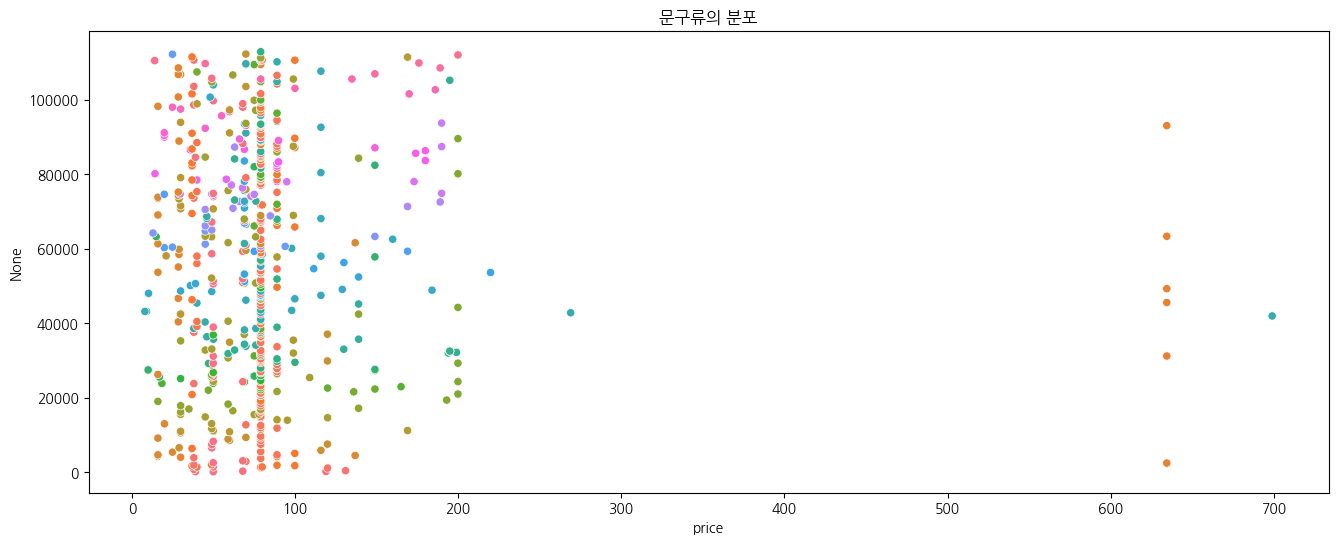

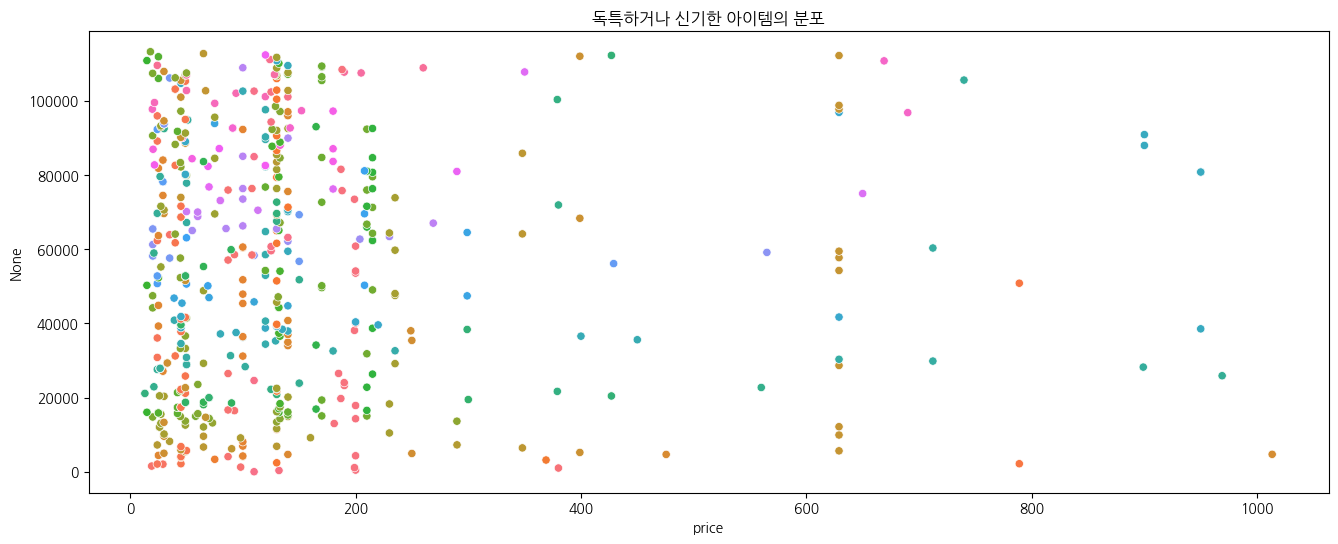

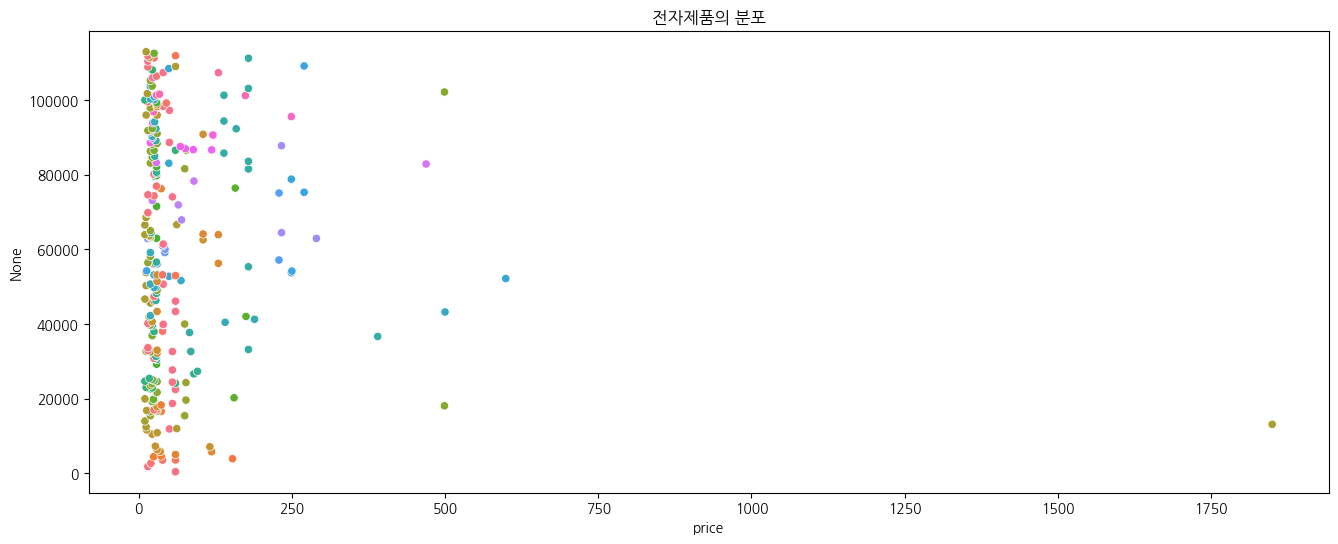

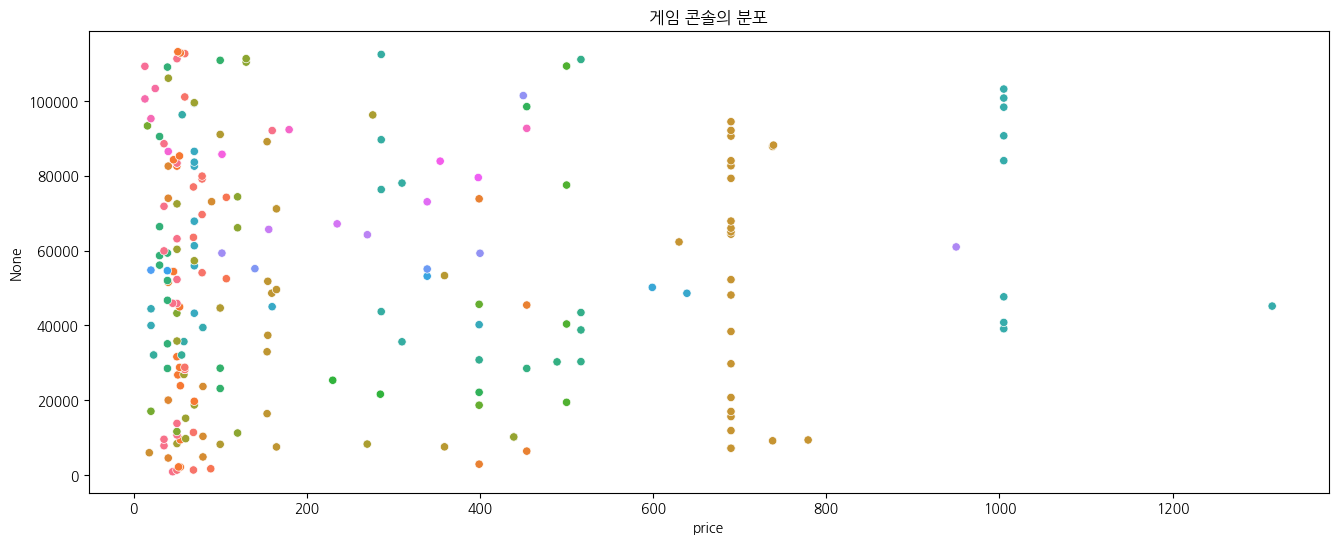

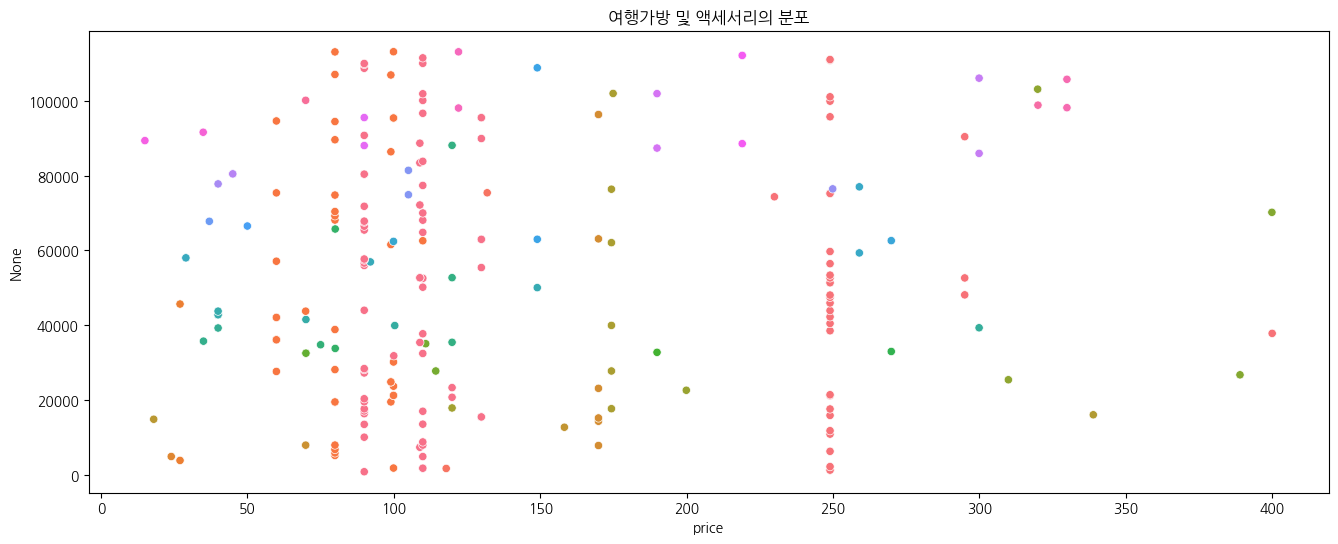

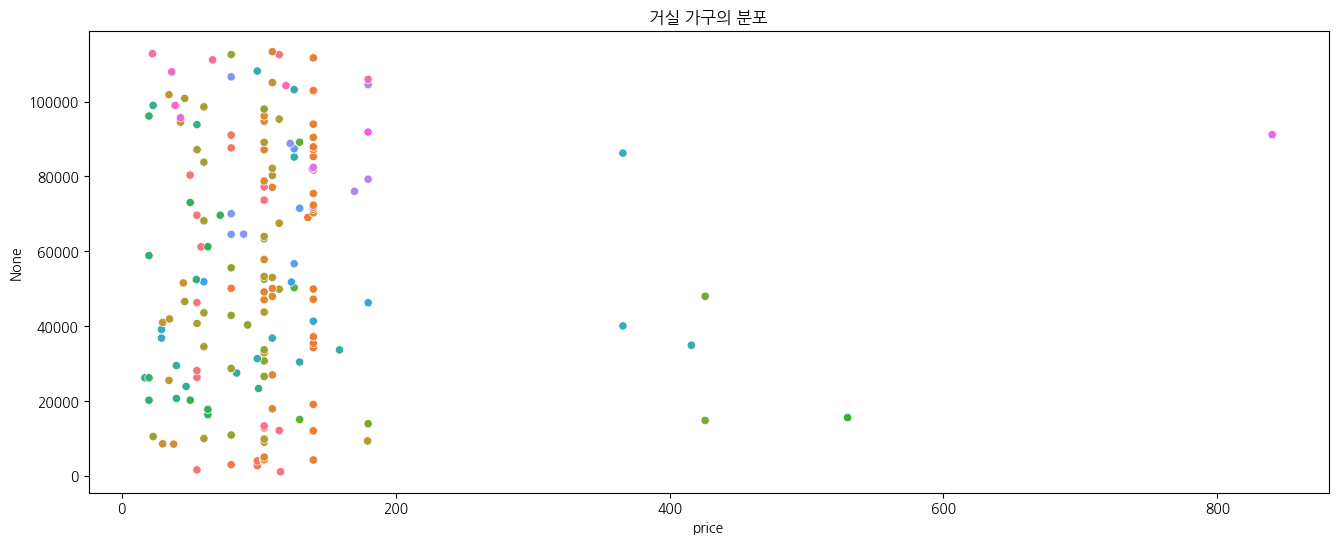

In [82]:
top20_categories = photo_2["product_category_name"].value_counts().head(20).index

for i in top20_categories:

    plt.figure(figsize=(16, 6))

    d6 = pd.DataFrame(

        photo_2[photo_2["product_category_name"] == i].loc[:, ["price", "product_id"]]
    )

    sns.scatterplot(data=d6, x=d6["price"], y=d6.index, hue="product_id")

    plt.title(f"{i}의 분포")

    plt.legend([], [], frameon=False)

### 프로젝트 방향
1. 사진의 갯수별로 카테고리의 순위가 달라짐
2. 사진이 적을때는 가정, 일상 용품의 특징을 가진 제품들 / 많을 때는 시계, 스포츠 등 취미나 매니아틱한 유형의 카테고리가 높은 순위로 올라옴
    Q. 카테고리별 제품 가격 분포는 어떠할까? -> 그룹화(유형-취미,일상.../분포모양-범위)

### 카테고리별 상품 가격 분포 분석
- #### 1장
'침대, 식탁보, 목욕 용품' 
범위 : ~800, 분포:0~200에 몰려있음,450정도에 몰린 구간이 존재 800을 넘는 값이 있음.

'미용 및 건강 제품'
범위 : ~2500, 분포:0~250에 몰려있음,450정도에 몰린 구간이 존재 2500을 넘는 값이 있음.

'스포츠 및 레저 활동'
범위 : ~4000, 분포:0~250에 몰려있음, 4000을 넘는 값이 있음.

'컴퓨터 및 액세서리'
범위 : ~2500, 분포:0~250에 몰려있음,450정도에 몰린 구간이 존재 2500을 넘는 값이 있음.

'가구 및 홈 데코'
범위 : ~1750, 분포:0~250에 몰려있음,300정도에 몰린 구간이 존재 1750을 넘는 값이 있음.

'가정용 필수품 및 일상 용품'
범위 : ~1750, 분포:0~200에 몰려있음,300정도에 몰린 구간이 존재 1750을 넘는 값이 있음.

'향수 및 프래그런스'
범위 : ~700, 분포:0~500에 흩어져있음,특정 구간별 몰린 구간이 있음 700을 넘는 값이 있음.

'독특하거나 신기한 아이템'
범위 : ~2500, 분포:0~250에 몰려있음,2500을 넘는 값이 있음.

'전자제품'
'시계 및 선물'
'자동차 제품 및 액세서리'
'사무용 가구'
'통신 기기
전화기 포함'
'아기 제품',
'장난감'
'정원 도구'
'애완동물 용품'
'문구류'
'여행가방 및 액세서리'
'패션 액세서리 및 가방'



- 사진 갯수에 따라 같은 카테고리라도 분포 모양에서 차이가 생김
